# Introduction to neural networks(1)
* 请同学们结合课堂代码和课上知识，在理解的基础上，适当的调整网络结构，增加节点数和层数，用numpy模拟网络前馈和BP过程并用代码验证答案
* 请大家在下次课程前完成Keras和Pytorch的安装
* 建议先去官网了解版本信息和安装方法，注意GPU和CPU版本安装的区别和环境要求；一般情况下安装最新版本框架即可，可以安装在同一个环境，；
* 通常我们做开发和测试，需要在多个本地开发环境之间进行切换，所以建议使用anaconda进行环境管理；
* 本次课后练习内容不需要提交，自己练习即可，我们下次再见！祝大家学习愉快！

## Forward propagation code

In [1]:
import numpy as np

input_data = np.array([2, 3])

weights = {'node_0': np.array([1, 1]),
           'node_1': np.array([-1, 1]),
           'output': np.array([2, -1])}

node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

In [4]:
hidden_layer_values = np.array([node_0_value, node_1_value])
hidden_layer_values

array([5, 1])

In [5]:
output = (hidden_layer_values * weights['output']).sum()
output

9

## Activation functions
tanh

In [6]:
input_data = np.array([1, 3])

weights = {'node_0': np.array([2, 4]),
           'node_1': np.array([4, -5]),
           'output': np.array([2, 7])} 

node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)

node_1_input = (input_data * weights['node_1']).sum() 
node_1_output = np.tanh(node_1_input)

hidden_layer_outputs = np.array([node_0_output, node_1_output]) 
output = (hidden_layer_outputs * weights['output']).sum()
output

-4.99999999609751

ReLU

In [8]:
def relu(input):
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return output

In [9]:
# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

28


Function

In [10]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [11]:
# Create empty list to store prediction results
input_data = [np.array([3, 5]), 
              np.array([ 1, -1]), 
              np.array([0, 0]), 
              np.array([8, 4])]
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


## Backpropagation
Code to calculate slopes and update weights

In [12]:
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
# forward
preds = (weights * input_data).sum()
error = preds - target
error

5

In [13]:
gradient = 2 * input_data * error
gradient

array([30, 40])

In [14]:
# update weights
weights_updated = weights - learning_rate * gradient

# forward again
preds_updated = (weights_updated * input_data).sum()
error_update = preds_updated - target
error_update

2.5

**思考：未激活的神经元，梯度如何传递？**

Function->可视化Loss下降效果

In [15]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def get_slope(input_data, target, weights):
    """calculate slope"""
    pred = (weights * input_data).sum()
    error = pred - target
    return 2 * input_data * error


def get_mse(input_data, target, weights):
    """calculate slope"""
    pred = (weights * input_data).sum()
    return mean_squared_error(target, np.array([pred]))

In [16]:
# Initialization
input_data = np.array([1, 2, 3])
target = [0]
weights = np.array([-0.49949539,  1.00100921, -0.49848618])
n_updates = 20
mse_hist = []

In [17]:
# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

In [21]:
len(mse_hist), mse_hist

(20,
 [2.5871798628915685e-05,
  1.3411940409229891e-05,
  6.952749908145197e-06,
  3.6043055523836167e-06,
  1.8684719983556669e-06,
  9.68615883947228e-07,
  5.021304742377143e-07,
  2.6030443784506674e-07,
  1.3494182057879125e-07,
  6.995383978789504e-08,
  3.62640705461023e-08,
  1.8799294171109175e-08,
  9.745554098345081e-09,
  5.052095244574515e-09,
  2.619006174764702e-09,
  1.3576928009934397e-09,
  7.038279480255739e-10,
  3.6486440825510026e-10,
  1.8914570923700093e-10,
  9.805313566969258e-11])

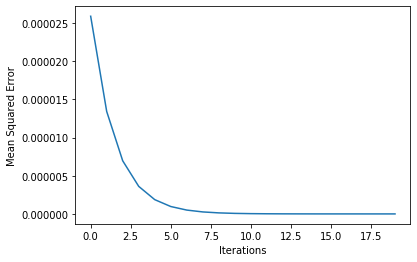

In [22]:
# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Keras
### Creating a Keras model

In [27]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd

# Save the number of columns in dataset: n_cols
df_wages = pd.read_csv('./data/hourly_wages.csv')
n_cols = df_wages.iloc[:, 1:].shape[1]
# Set up the model: model
model = Sequential()
# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
# Add the second layer
model.add(Dense(32, activation='relu'))
# Add the output layer
model.add(Dense(1))

In [24]:
df_wages.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


### Compiling and fitting a model
https://keras.io/optimizers/#adam

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')
print("Loss function: " + model.loss)

Loss function: mean_squared_error


In [31]:
model.fit(df_wages.iloc[:, 1:], df_wages.iloc[:, 0], epochs=10)

Epoch 1/10
534/534 [==============================] - 0s 71us/step - loss: 28.1677
Epoch 2/10
534/534 [==============================] - 0s 88us/step - loss: 26.6352
Epoch 3/10
534/534 [==============================] - 0s 47us/step - loss: 23.1542
Epoch 4/10
534/534 [==============================] - 0s 53us/step - loss: 22.3186
Epoch 5/10
534/534 [==============================] - 0s 56us/step - loss: 21.8706
Epoch 6/10
534/534 [==============================] - 0s 41us/step - loss: 21.9674
Epoch 7/10
534/534 [==============================] - 0s 69us/step - loss: 21.4982
Epoch 8/10
534/534 [==============================] - 0s 54us/step - loss: 21.4613
Epoch 9/10
534/534 [==============================] - 0s 58us/step - loss: 21.2723
Epoch 10/10
534/534 [==============================] - 0s 63us/step - loss: 21.1764


### Classification model
* `categorical_crossentropy` loss function
* Similar to log loss: Lower is better
* Add `metrics = ['accuracy']` to compile step for easy-to-understand diagnostics
* Output layer has separate node for each possible outcome, and uses 'softmax' activation

In [32]:
df_titanic = pd.read_csv('./resource/titanic_all_numeric.csv')
X_train_titanic = df_titanic.drop(['survived'], axis=1)
n_cols = X_train_titanic.shape[1]

In [33]:
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [34]:
# Import necessary modules
from keras.utils import to_categorical
# Convert the target to categorical: 'target'
y_train_titanic = to_categorical(df_titanic.survived)
# Set up the model
model = Sequential()
# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
# Add the output layer
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(optimizer='sgd', loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
# Fit the model
model.fit(X_train_titanic, y_train_titanic, epochs=10)

Epoch 1/10
891/891 [==============================] - 0s 179us/step - loss: 2.3606 - accuracy: 0.5960
Epoch 2/10
891/891 [==============================] - 0s 47us/step - loss: 0.8444 - accuracy: 0.6476
Epoch 3/10
891/891 [==============================] - 0s 53us/step - loss: 0.6293 - accuracy: 0.6554
Epoch 4/10
891/891 [==============================] - 0s 34us/step - loss: 0.6223 - accuracy: 0.6779
Epoch 5/10
891/891 [==============================] - 0s 36us/step - loss: 0.6329 - accuracy: 0.6869
Epoch 6/10
891/891 [==============================] - 0s 46us/step - loss: 0.6129 - accuracy: 0.6902
Epoch 7/10
891/891 [==============================] - 0s 54us/step - loss: 0.6082 - accuracy: 0.6902
Epoch 8/10
891/891 [==============================] - 0s 35us/step - loss: 0.6090 - accuracy: 0.7037
Epoch 9/10
891/891 [==============================] - 0s 41us/step - loss: 0.6040 - accuracy: 0.6880
Epoch 10/10
891/891 [==============================] - 0s 39us/step - loss: 0.6109 - accur

### Using models
Saving, reloading and using your Model

In [37]:
from keras.models import load_model
model.save('./models/model_file.h5')

my_model = load_model('./models/model_file.h5')
predictions = my_model.predict(X_train_titanic)
probability_true = predictions[:, 1]

In [39]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________
